<a href="https://colab.research.google.com/github/SU-IST707-SP25/student-weekly-1-jmatrone/blob/master/MoreIST707Code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/IST707_FinalProject/data/uncleaned_data.csv'

In [ ]:
import os


if os.path.isfile(file_path):
    print("CSV file found")
else:
    print("CSV file not found. Check the path.")


CSV file found


In [ ]:
import pandas as pd

# Read the file using pandas
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())

   Unnamed: 0.1             name           club_x  \
0             0          Ederson  Manchester City   
1             1       Rúben Dias  Manchester City   
2             2  Aymeric Laporte  Manchester City   
3             3      John Stones  Manchester City   
4             4       Nathan Aké  Manchester City   

                                            injuries  Unnamed: 0 nationality  \
0  [('20/21', 'Virus Infection', 'Dec 27, 2020', ...         689      br BRA   
1  [('21/22', 'Knock', 'Mar 3, 2022', 'Apr 11, 20...         615      pt POR   
2  [('22/23', 'Knee Surgery', 'Jun 30, 2022', 'Oc...        1232      es ESP   
3  [('22/23', 'Hamstring Injury', 'Sep 26, 2022',...        2101     eng ENG   
4  [('20/21', 'Hamstring Injury', 'Dec 27, 2020',...          37      nl NED   

  position           club_y     age  birth_year  ...  touches_live_ball  \
0       GK  Manchester City  29-100        1993  ...              547.0   
1       DF  Manchester City  25-195        1997  .

In [ ]:
import pandas as pd


ratings_data = pd.read_csv('/content/drive/MyDrive/IST707_FinalProject/data/final_ratings.csv')
ratings_data.head()

,FC 25,FC 24,Name,FIFA 23,FIFA 22,FIFA 21,FIFA 20,FIFA 19,FIFA 18,FIFA 17,FIFA 16,FIFA 15,FIFA 14/25,FIFA 13,FIFA 12,FIFA 11,FIFA 10,FIFA 09,FIFA 08,FIFA 07
0,80.0,77.0,ederson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,88.0,89.0,rúben-dias,88.0,87.0,81.0,80.0,78.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83.0,85.0,aymeric-laporte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85.0,85.0,john-stones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.0,81.0,nathan-aké,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
# 1. Mount Google Drive & import libraries
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import ast
from unidecode import unidecode

# 2. Load raw files
df = pd.read_csv('/content/drive/MyDrive/IST707_FinalProject/data/uncleaned_data.csv')
ratings_data = pd.read_csv('/content/drive/MyDrive/IST707_FinalProject/data/final_ratings.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 3. Define working copy
injury_flat = df.copy()

In [ ]:
print(injury_flat.columns.tolist())


['Unnamed: 0.1', 'name', 'club_x', 'injuries', 'Unnamed: 0', 'nationality', 'position', 'club_y', 'age', 'birth_year', 'games', 'games_starts', 'minutes', 'cards_yellow', 'cards_red', 'minutes_90s', 'goals', 'shots', 'shots_free_kicks', 'passes_completed', 'passes', 'passes_total_distance', 'passes_progressive_distance', 'passes_short', 'passes_medium', 'passes_long', 'passes_live', 'passes_dead', 'passes_free_kicks', 'through_balls', 'passes_switches', 'crosses', 'corner_kicks', 'tackles', 'tackles_won', 'dribble_tackles', 'dribbled_past', 'blocks', 'interceptions', 'clearances', 'errors', 'touches', 'touches_live_ball', 'dribbles', 'miscontrols', 'dispossessed', 'passes_received', 'fouls', 'fouled', 'ball_recoveries', 'aerials_won', 'aerials_lost,']


In [ ]:
print(injury_flat['injuries'].iloc[0])


[('20/21', 'Virus Infection', 'Dec 27, 2020', 'Jan 12, 2021', '16', '3'), ('19/20', 'Ill', 'Dec 30, 2019', 'Jan 7, 2020', '8', '3'), ('19/20', 'Ill', 'Dec 8, 2019', 'Dec 14, 2019', '6', '1'), ('19/20', 'Muscular problems', 'Nov 6, 2019', 'Nov 22, 2019', '16', '2'), ('17/18', 'Facial Injury', 'Sep 10, 2017', 'Sep 12, 2017', '2', 0), ('16/17', 'Meniscal Injury', 'Jul 11, 2016', 'Aug 9, 2016', '29', '1')]


In [ ]:
import ast

# Step 1: Safely parse the stringified list of tuples
injury_flat = []

for i, row in df.iterrows():
    name = row['name']
    age = row['age']
    dribbles = row['dribbles']
    fouls = row['fouls']
    fouled = row['fouled']
    passes_received = row['passes_received']

    try:
        injuries = ast.literal_eval(row['injuries'])
    except:
        continue  # skip if format is invalid

    for injury in injuries:
        try:
            season, injury_type, start, end, days, matches = injury
            days = int(days)  # convert to integer
            injury_flat.append({
                'name': name,
                'age': age,
                'dribbles': dribbles,
                'fouls': fouls,
                'fouled': fouled,
                'passes_received': passes_received,
                'injury_type': injury_type,
                'days_injured': days
            })
        except:
            continue

injury_flat = pd.DataFrame(injury_flat)


In [ ]:
def extract_region_fixed(injury):
    if pd.isna(injury): return 'other'
    injury = str(injury).lower()

    # Specific reclassifications
    if 'toe' in injury: return 'foot'
    if 'biceps femoris' in injury: return 'hamstring'
    if 'adductor' in injury or 'abductor' in injury: return 'groin'
    if 'quadriceps' in injury: return 'thigh'
    if 'tendon' in injury: return 'knee'
    if 'fibre' in injury or 'muscle' in injury or 'strain' in injury or 'tear' in injury:
        if 'hamstring' in injury: return 'hamstring'
        if 'thigh' in injury: return 'thigh'
        if 'calf' in injury: return 'calf'
        if 'groin' in injury: return 'groin'
        return 'hamstring'
    if 'bruise' in injury:
        for part in ['knee', 'ankle', 'foot', 'head', 'rib', 'hip', 'thigh']:
            if part in injury:
                return part
        return 'thigh'

    # General part match
    parts = [
        'knee', 'ankle', 'hamstring', 'groin', 'hip', 'foot', 'back',
        'shoulder', 'rib', 'arm', 'hand', 'thigh', 'calf', 'pelvis',
        'neck', 'head', 'chest', 'lung'
    ]
    for part in parts:
        if part in injury:
            return part
    return 'other'


In [ ]:
def categorize_severity(days):
    if pd.isna(days): return 'unknown'
    days = int(days)
    if days < 4: return 'mild'
    elif days < 10: return 'moderate'
    else: return 'severe'


In [ ]:
# Normalize names for merging
injury_flat['name'] = injury_flat['name'].str.lower().str.replace('-', ' ').str.strip().apply(unidecode)
ratings_data['Name'] = ratings_data['Name'].str.lower().str.replace('-', ' ').str.strip().apply(unidecode)

# Region mapping
injury_flat['region'] = injury_flat['injury_type'].apply(extract_region_fixed)

# Filter irrelevant
drop_keywords = ['cold', 'fever', 'quarantine', 'fitness', 'rest', 'appendectomy', 'abdominal', 'abdomen', 'surgery']
injury_flat = injury_flat[~injury_flat['injury_type'].str.lower().str.contains('|'.join(drop_keywords), na=False)]
injury_flat = injury_flat[injury_flat['region'] != 'other']

# Categorize severity
injury_flat['severity_level'] = injury_flat['days_injured'].apply(categorize_severity)
injury_flat['injury_group'] = injury_flat['region'] + '_' + injury_flat['severity_level']

# Pivot to wide format
injury_matrix = injury_flat.pivot_table(
    index=['name', 'age', 'dribbles', 'fouls', 'fouled', 'passes_received'],
    columns='injury_group',
    values='days_injured',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Merge with FIFA ratings
injury_matrix['name_clean'] = injury_matrix['name'].str.lower().str.replace('-', ' ').str.strip().apply(unidecode)
ratings_data['Name_clean'] = ratings_data['Name'].str.lower().str.replace('-', ' ').str.strip().apply(unidecode)

injury_matrix = injury_matrix.merge(
    ratings_data[['Name_clean', 'FC 24']].drop_duplicates(),
    left_on='name_clean',
    right_on='Name_clean',
    how='left'
)

injury_matrix.drop(columns=['name_clean', 'Name_clean'], inplace=True)

# Final checks
print("Final DataFrame Shape:", injury_matrix.shape)
print(" Non-null FIFA ratings:", injury_matrix['FC 24'].notna().sum())
print(" 'other_*' columns present:", injury_matrix.columns[injury_matrix.columns.str.startswith('other')].tolist())
print(" Total days injured:",
      int(injury_matrix.drop(columns=['name', 'age', 'dribbles', 'fouls', 'fouled', 'passes_received', 'FC 24']).sum().sum()))
print("Example injury columns:",
      [col for col in injury_matrix.columns if '_' in col][:5])


Final DataFrame Shape: (1489, 56)
 Non-null FIFA ratings: 1438
 'other_*' columns present: []
 Total days injured: 204326
Example injury columns: ['passes_received', 'ankle_mild', 'ankle_moderate', 'ankle_severe', 'arm_mild']


<ipython-input-14-d95badce1432>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_flat['severity_level'] = injury_flat['days_injured'].apply(categorize_severity)
<ipython-input-14-d95badce1432>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_flat['injury_group'] = injury_flat['region'] + '_' + injury_flat['severity_level']


In [ ]:
print("injury_matrix shape:", injury_matrix.shape)
print("Does injury_matrix have FIFA 24?", 'FC 24' in injury_matrix.columns)
print("injury_matrix non-null FIFA 24:", injury_matrix['FC 24'].notna().sum())

# Just in case you're actually looking at another DataFrame
try:
    print("injury_summary shape:", injury_summary.shape)
    print("Does injury_summary have FIFA 24?", 'FC 24' in injury_summary.columns)
    print("injury_summary non-null FIFA 24:", injury_summary['FC 24'].notna().sum())
except:
    print("injury_summary not defined.")


injury_matrix shape: (1489, 56)
Does injury_matrix have FIFA 24? True
injury_matrix non-null FIFA 24: 1438
injury_summary not defined.


In [ ]:
from unidecode import unidecode

# Clean names again
injury_matrix['name_clean'] = injury_matrix['name'].str.lower().str.replace('-', ' ').str.strip().apply(unidecode)
ratings_data['Name_clean'] = ratings_data['Name'].str.lower().str.replace('-', ' ').str.strip().apply(unidecode)

# Drop if 'FC 24' already exists from bad merge
if 'FC 24' in injury_matrix.columns:
    injury_matrix = injury_matrix.drop(columns=['FC 24'])

# Merge FIFA 24 scores
injury_matrix = injury_matrix.merge(
    ratings_data[['Name_clean', 'FC 24']].drop_duplicates(),
    left_on='name_clean',
    right_on='Name_clean',
    how='left'
)

# Drop temp columns
injury_matrix.drop(columns=['name_clean', 'Name_clean'], inplace=True)

# Show results
print("✅ Final FIFA 24 matches:", injury_matrix['FC 24'].notna().sum())
print("❌ Still unmatched:", injury_matrix['FC 24'].isna().sum())


✅ Final FIFA 24 matches: 1438
❌ Still unmatched: 51


In [ ]:
injury_matrix.head(10)


,name,age,dribbles,fouls,fouled,passes_received,ankle_mild,ankle_moderate,ankle_severe,arm_mild,...,rib_mild,rib_moderate,rib_severe,shoulder_mild,shoulder_moderate,shoulder_severe,thigh_mild,thigh_moderate,thigh_severe,FC 24
0,aaron cresswell,32-345,6.0,7.0,5.0,583.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,77.0
1,aaron hickey,20-168,25.0,7.0,17.0,228.0,0,0,82,0,...,0,0,0,0,0,13,0,0,0,76.0
2,aaron martin,25-217,15.0,15.0,6.0,411.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,aaron ramsey,31-334,14.0,7.0,10.0,306.0,0,0,0,0,...,0,0,0,0,0,0,0,0,22,74.0
4,aaron wan bissaka,24-364,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,12,0,0,0,80.0
5,abdallah sima,21-161,5.0,10.0,7.0,118.0,0,0,35,0,...,0,0,0,0,0,0,0,0,0,70.0
6,abdelhamid sabiri,25-362,35.0,21.0,28.0,338.0,0,0,13,0,...,0,0,0,0,0,0,0,0,0,70.0
7,abdon prats,29-353,4.0,2.0,4.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71.0
8,abdou diallo,26-205,3.0,3.0,1.0,283.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,78.0
9,abdou harroui,24-316,3.0,6.0,0.0,119.0,1,0,0,0,...,0,0,0,0,14,0,0,0,0,72.0


In [ ]:
# Drop rows that do not have a fifa rating
injury_matrix = injury_matrix.dropna(subset=['FC 24']).reset_index(drop=True)
print("After dropping NaNs, shape:", injury_matrix.shape)


After dropping NaNs, shape: (1438, 56)


In [ ]:
# Confirm no NaNs in the entire dataset
print("Total NaNs in dataset:", injury_matrix.isna().sum().sum())


Total NaNs in dataset: 0


In [ ]:
print(injury_matrix.columns.tolist())


['name', 'age', 'dribbles', 'fouls', 'fouled', 'passes_received', 'ankle_mild', 'ankle_moderate', 'ankle_severe', 'arm_mild', 'arm_moderate', 'arm_severe', 'back_mild', 'back_moderate', 'back_severe', 'calf_mild', 'calf_moderate', 'calf_severe', 'chest_mild', 'chest_severe', 'foot_mild', 'foot_moderate', 'foot_severe', 'groin_mild', 'groin_moderate', 'groin_severe', 'hamstring_mild', 'hamstring_moderate', 'hamstring_severe', 'hand_mild', 'hand_moderate', 'hand_severe', 'head_mild', 'head_moderate', 'head_severe', 'hip_mild', 'hip_moderate', 'hip_severe', 'knee_mild', 'knee_moderate', 'knee_severe', 'lung_severe', 'neck_mild', 'neck_moderate', 'neck_severe', 'pelvis_severe', 'rib_mild', 'rib_moderate', 'rib_severe', 'shoulder_mild', 'shoulder_moderate', 'shoulder_severe', 'thigh_mild', 'thigh_moderate', 'thigh_severe', 'FC 24']


In [ ]:
# Do any columns have all 0
# Select only the injury columns (excluding metadata and FC 24 score)
injury_cols = [col for col in df.columns if col not in ['name', 'age', 'dribbles', 'fouls', 'fouled', 'passes_received', 'FC 24']]

# Find columns where the sum of all values is 0 (i.e., no injuries recorded)
no_injury_cols = [col for col in injury_cols if df[col].sum() == 0]

print("Columns with all zeros (no player ever had this injury):")
print(no_injury_cols)


Columns with all zeros (no player ever had this injury):
[]


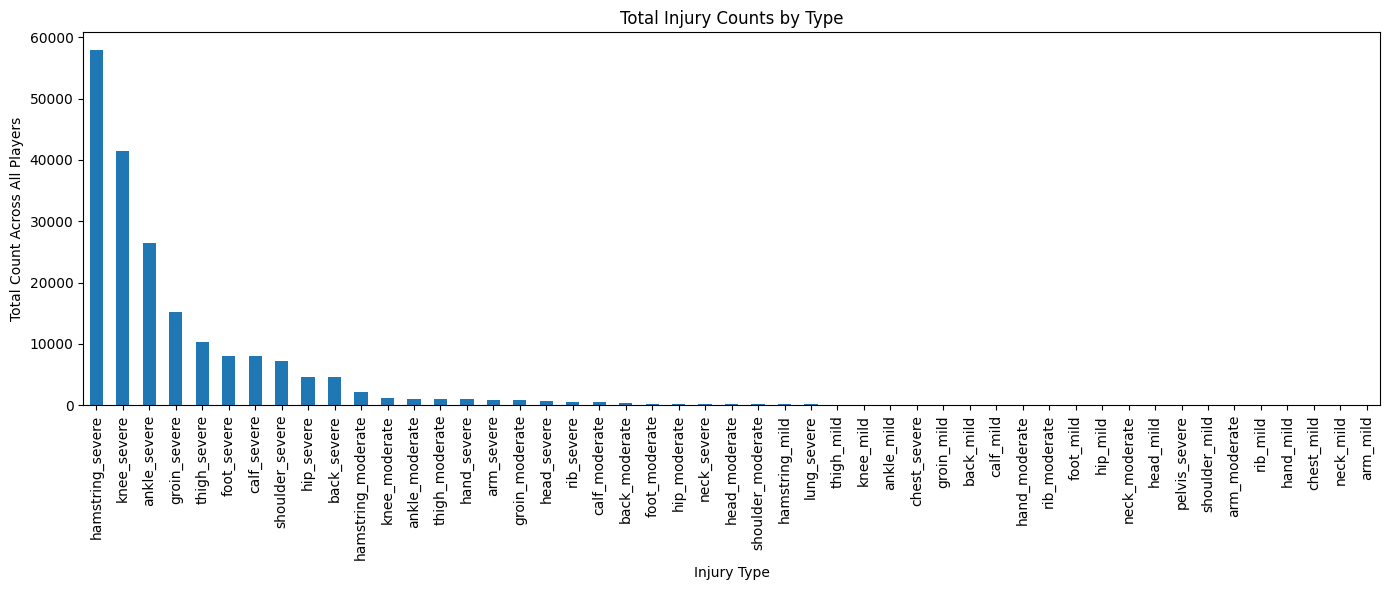

In [ ]:
# Visulize the data
import matplotlib.pyplot as plt

# Select only the injury columns (excluding metadata like name, age, FIFA score, etc.)
injury_columns = injury_matrix.columns.difference(['name', 'age', 'dribbles', 'fouls', 'fouled', 'passes_received', 'FC 24'])

# Sum the injury counts for each column
injury_totals = injury_matrix[injury_columns].sum().sort_values(ascending=False)

# Plot the totals
plt.figure(figsize=(14, 6))
injury_totals.plot(kind='bar')
plt.title('Total Injury Counts by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Count Across All Players')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Identify injury columns again (excluding metadata columns)
injury_columns = injury_matrix.columns.difference(['name', 'age', 'dribbles', 'fouls', 'fouled', 'passes_received', 'FC 24'])

# Sum total injury days for each column
injury_totals = injury_matrix[injury_columns].sum().sort_values()

# Show the bottom 10 injury types
print("🔻 Bottom 10 injury types by total days:")
print(injury_totals.head(10))


🔻 Bottom 10 injury types by total days:
arm_mild          1
chest_mild        3
neck_mild         3
hand_mild        10
rib_mild         12
arm_moderate     12
shoulder_mild    13
pelvis_severe    14
head_mild        23
neck_moderate    25
dtype: int64


In [ ]:
# List columns that are actual injury durations (not metadata or ratings)
exclude = ['name', 'age', 'dribbles', 'fouls', 'fouled', 'passes_received', 'FC 24']
injury_cols = [col for col in injury_matrix.columns if col not in exclude]

# Sum total days injured
total_days_now = injury_matrix[injury_cols].sum().sum()
print("✅ Total days injured (cleaned dataset):", int(total_days_now))


✅ Total days injured (cleaned dataset): 196561


In [ ]:
# List injury columns (exclude metadata + FIFA)
exclude = ['name', 'age', 'dribbles', 'fouls', 'fouled', 'passes_received', 'FC 24']
injury_cols = [col for col in injury_matrix.columns if col not in exclude]

# Count players with all-zero injuries
players_with_no_injuries = (injury_matrix[injury_cols].sum(axis=1) == 0).sum()
players_with_injuries = len(injury_matrix) - players_with_no_injuries

print(f"🟢 Players WITH at least one injury: {players_with_injuries}")
print(f"🔘 Players with NO injuries at all: {players_with_no_injuries}")


🟢 Players WITH at least one injury: 1435
🔘 Players with NO injuries at all: 3


## Modeling & Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

X = injury_matrix.drop(columns=['name', 'age', 'dribbles', 'fouls', 'fouled', 'passes_received', 'FC 24'])
y = injury_matrix['FC 24']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
injury_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1438 non-null   object 
 1   age                 1438 non-null   object 
 2   dribbles            1438 non-null   float64
 3   fouls               1438 non-null   float64
 4   fouled              1438 non-null   float64
 5   passes_received     1438 non-null   float64
 6   ankle_mild          1438 non-null   int64  
 7   ankle_moderate      1438 non-null   int64  
 8   ankle_severe        1438 non-null   int64  
 9   arm_mild            1438 non-null   int64  
 10  arm_moderate        1438 non-null   int64  
 11  arm_severe          1438 non-null   int64  
 12  back_mild           1438 non-null   int64  
 13  back_moderate       1438 non-null   int64  
 14  back_severe         1438 non-null   int64  
 15  calf_mild           1438 non-null   int64  
 16  calf_m

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
print("Random Forest R^2 score:", rf_model.score(X_test, y_test))

Random Forest R^2 score: -0.04182152839653064


In [ ]:
# Gradient Boosting Tree Classifier
gbc_model = GradientBoostingClassifier(max_depth=6, random_state=42)
gbc_model.fit(X_train, y_train)

# Evaluate
print("Gradient Boosting R^2 score:", gbc_model.score(X_test, y_test))

y_pred_gbc = gbc_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_gbc)
print(f"Decision Tree Accuracy: {accuracy}")

# Classification Report
print(f"Classification Report:\n{classification_report(y_test, y_pred_gbc)}")

Gradient Boosting R^2 score: 0.0763888888888889
Decision Tree Accuracy: 0.0763888888888889
Classification Report:
              precision    recall  f1-score   support

        62.0       0.00      0.00      0.00         1
        64.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         1
        66.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         2
        68.0       0.00      0.00      0.00         3
        69.0       0.00      0.00      0.00        11
        70.0       0.22      0.25      0.24         8
        71.0       0.00      0.00      0.00        21
        72.0       0.05      0.06      0.05        18
        73.0       0.15      0.17      0.16        30
        74.0       0.16      0.32      0.21        19
        75.0       0.07      0.05      0.06        20
        76.0       0.05      0.10      0.07        20
        77.0       0.03      0.04      0.03        27
        78.0       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
# Decision Tree
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)

print("Decision Tree R^2 score:", dtc_model.score(X_test, y_test))

y_pred_dtc = dtc_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_dtc)
print(f"Decision Tree Accuracy: {accuracy}")

# Classification Report
print(f"Classification Report:\n{classification_report(y_test, y_pred_dtc)}")

Decision Tree R^2 score: 0.034722222222222224
Decision Tree Accuracy: 0.034722222222222224
Classification Report:
              precision    recall  f1-score   support

        62.0       0.00      0.00      0.00         1
        64.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         1
        66.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         2
        68.0       0.00      0.00      0.00         3
        69.0       0.00      0.00      0.00        11
        70.0       0.00      0.00      0.00         8
        71.0       0.04      0.05      0.04        21
        72.0       0.00      0.00      0.00        18
        73.0       0.05      0.03      0.04        30
        74.0       0.09      0.11      0.10        19
        75.0       0.05      0.05      0.05        20
        76.0       0.05      0.05      0.05        20
        77.0       0.06      0.07      0.07        27
        78.0       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate
print("Decision Tree R^2 score:", dt_model.score(X_test, y_test))

Decision Tree R^2 score: -0.8436186363246316


In [ ]:
# Regression Model
from sklearn.linear_model import LinearRegression

# Fit
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
print("R^2 score:", model.score(X_test, y_test))

R^2 score: 0.05851683194549484
